In [56]:
import tool_kit as tk
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
msft = pd.read_csv('MSFT.csv',parse_dates=['Date'],index_col=0)
msft = msft[['Adj Close','Volume']].rename(columns={'Adj Close':'msft_price','Volume':'msft_volume'})
visa = pd.read_csv('V.csv',parse_dates=['Date'],index_col=0)
visa = visa[['Adj Close','Volume']].rename(columns={'Adj Close':'visa_price','Volume':'visa_volume'})
amzn = pd.read_csv('AMZN.csv',parse_dates=['Date'],index_col=0)
amzn = amzn[['Adj Close','Volume']].rename(columns={'Adj Close':'amzn_price','Volume':'amzn_volume'})
example = pd.concat([msft,amzn,visa],axis=1)
example  = example.resample('M').last()
#example.to_csv('example.csv')

In [58]:
df = pd.read_csv('example.csv',parse_dates=['Date'],index_col=0)
cols = list(df.columns)
df

,msft_price,msft_volume,amzn_price,amzn_volume,visa_price,visa_volume
Date,,,,,,
2017-01-31,59.552139,25270500,41.174000,62744000,79.475830,7479400
2017-02-28,59.292274,23239800,42.251999,55874000,84.662178,8521900
2017-03-31,61.034527,21040300,44.327000,79152000,85.557533,6429800
2017-04-30,63.444027,39548800,46.249500,147294000,87.819946,6888500
2017-05-31,65.093895,30436400,49.730999,78262000,91.843155,9866000
...,...,...,...,...,...,...
2022-08-31,260.735199,24791800,126.769997,53648700,198.266846,6559000
2022-09-30,232.245483,35694800,113.000000,59479600,177.253799,9472300
2022-10-31,231.477661,28357300,102.440002,99251400,206.697998,8674100


In [59]:
rets = []
for i in ['msft_price','amzn_price','visa_price']:
    col = "{}_ret".format(i)
    df[col] = df[i].pct_change() 
    rets.append(col)
df = df.dropna()
df

,msft_price,msft_volume,amzn_price,amzn_volume,visa_price,visa_volume,msft_price_ret,amzn_price_ret,visa_price_ret
Date,,,,,,,,,
2017-02-28,59.292274,23239800,42.251999,55874000,84.662178,8521900,-0.004364,0.026182,0.065257
2017-03-31,61.034527,21040300,44.327000,79152000,85.557533,6429800,0.029384,0.049110,0.010576
2017-04-30,63.444027,39548800,46.249500,147294000,87.819946,6888500,0.039478,0.043371,0.026443
2017-05-31,65.093895,30436400,49.730999,78262000,91.843155,9866000,0.026005,0.075276,0.045812
2017-06-30,64.245743,24161100,48.400002,67806000,90.444725,9036600,-0.013030,-0.026764,-0.015226
...,...,...,...,...,...,...,...,...,...
2022-08-31,260.735199,24791800,126.769997,53648700,198.266846,6559000,-0.066663,-0.060615,-0.061515
2022-09-30,232.245483,35694800,113.000000,59479600,177.253799,9472300,-0.109267,-0.108622,-0.105984
2022-10-31,231.477661,28357300,102.440002,99251400,206.697998,8674100,-0.003306,-0.093451,0.166113


In [60]:
tk.skewness(df[rets])

array([-0.01628913,  0.2763516 , -0.06291512])

In [61]:
tk.kurtosis(df[rets])

array([-0.26097588,  1.02439562, -0.40107173])

In [62]:
tk.compound(df[rets])

msft_price_ret    3.027059
amzn_price_ret    1.040122
visa_price_ret    1.614128
dtype: float64

In [63]:
tk.annualize_rets(df[rets],periods_per_year=12)

msft_price_ret    0.265469
amzn_price_ret    0.128071
visa_price_ret    0.176343
dtype: float64

In [64]:
tk.annualize_vol(df[rets],periods_per_year=12)

msft_price_ret    0.205337
amzn_price_ret    0.322762
visa_price_ret    0.222438
dtype: float64

In [65]:
tk.sharpe_ratio(df[rets],riskfree_rate=0.04,periods_per_year=12)

msft_price_ret    1.059202
amzn_price_ret    0.262709
visa_price_ret    0.591017
dtype: float64

In [66]:
tk.is_normal(df[rets],level=0.01)

msft_price_ret    True
amzn_price_ret    True
visa_price_ret    True
dtype: bool

In [67]:
tk.drawdown(df['amzn_price_ret'])

,Wealth,Previous Peak,Drawdown
Date,,,
2017-02-28,1026.181547,1026.181547,0.000000
2017-03-31,1076.577452,1076.577452,0.000000
2017-04-30,1123.269539,1123.269539,0.000000
2017-05-31,1207.825302,1207.825302,0.000000
2017-06-30,1175.499150,1207.825302,-0.026764
...,...,...,...
2022-08-31,3078.884660,4258.840530,-0.277060
2022-09-30,2744.450381,4258.840530,-0.355587
2022-10-31,2487.977899,4258.840530,-0.415809


Text(0.5, 1.0, 'Drawdown')

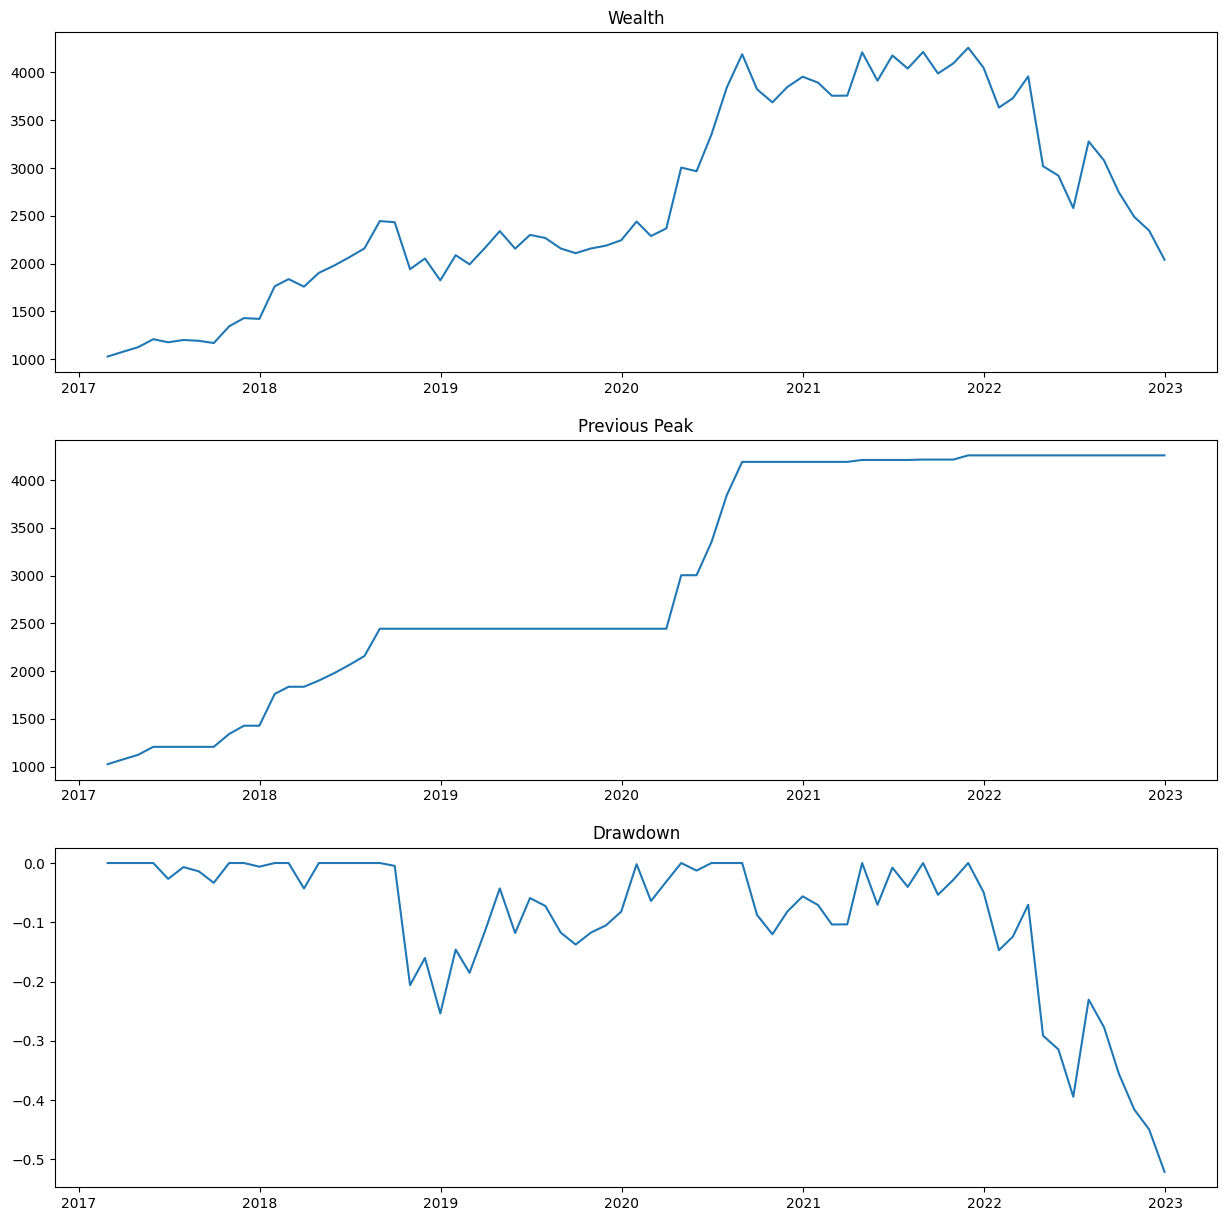

In [68]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,1,figsize=(15,15))
ax[0].plot(tk.drawdown(df['amzn_price_ret'])['Wealth'])
ax[0].set_title('Wealth')
ax[1].plot(tk.drawdown(df['amzn_price_ret'])['Previous Peak'])
ax[1].set_title('Previous Peak')
ax[2].plot(tk.drawdown(df['amzn_price_ret'])['Drawdown'])
ax[2].set_title('Drawdown')


In [69]:
print('For Amazon')
tk.drawdown(df['amzn_price_ret']).min()

For Amazon


Wealth           1026.181547
Previous Peak    1026.181547
Drawdown           -0.520968
dtype: float64

In [70]:
print('For Amazon')
tk.drawdown(df['amzn_price_ret']).max()

For Amazon


Wealth           4258.84053
Previous Peak    4258.84053
Drawdown            0.00000
dtype: float64

In [71]:
print('For Amazon')
tk.drawdown(df['amzn_price_ret']).idxmax()

For Amazon


Wealth          2021-11-30
Previous Peak   2021-11-30
Drawdown        2017-02-28
dtype: datetime64[ns]

In [72]:
print('For Amazon')
tk.drawdown(df['amzn_price_ret']).idxmin()

For Amazon


Wealth          2017-02-28
Previous Peak   2017-02-28
Drawdown        2022-12-31
dtype: datetime64[ns]

In [73]:
tk.semideviation(df[rets])

msft_price_ret    0.031989
amzn_price_ret    0.053398
visa_price_ret    0.033944
dtype: float64

In [74]:
tk.var_historic(df[rets],level=5)

msft_price_ret    0.071371
amzn_price_ret    0.113904
visa_price_ret    0.088243
dtype: float64

In [75]:
tk.cvar_historic(df[rets],level=5)

msft_price_ret    0.092131
amzn_price_ret    0.171518
visa_price_ret    0.106836
dtype: float64

In [76]:
tk.var_gaussian(df[rets],level=5)

msft_price_ret    0.075294
amzn_price_ret    0.137871
visa_price_ret    0.089232
dtype: float64

In [77]:
tk.var_gaussian(df[rets],level=5,modified=True)

msft_price_ret    0.079439
amzn_price_ret    0.134160
visa_price_ret    0.094744
dtype: float64

<AxesSubplot: title={'center': 'Different VaR at 5%'}>

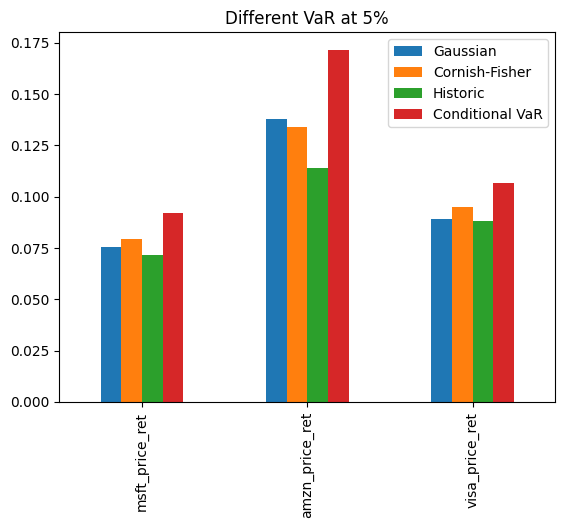

In [78]:
var_table = [tk.var_gaussian(df[rets]), 
             tk.var_gaussian(df[rets], modified=True), 
             tk.var_historic(df[rets]),
             tk.cvar_historic(df[rets])]
comparison = pd.concat(var_table, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic','Conditional VaR']
comparison.plot.bar(title= "Different VaR at 5%")

In [79]:
ew = np.repeat(1/3,3)
er = tk.annualize_rets(df[rets],len(df))
tk.portfolio_return(ew,er)

1.8937699789008926

In [80]:
cov = df[rets].cov()
tk.portfolio_vol(ew,cov)

0.06112919569886498

<AxesSubplot: xlabel='Volatility'>

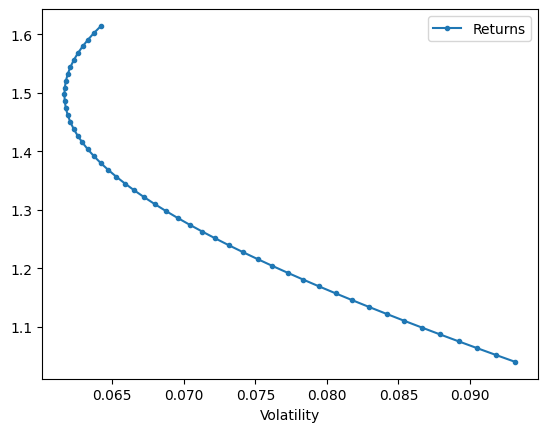

In [81]:
l = ['amzn_price_ret','visa_price_ret']
tk.plot_ef2(50,er[l].values,cov.loc[l,l].values)

In [82]:
weights_optimum = tk.minimize_vol(5, er[l], cov.loc[l,l])
vol = tk.portfolio_vol(weights_optimum, cov.loc[l,l])
vol

0.0641535256792044

In [83]:
weights_optimum

array([0.40639771, 0.59360229])

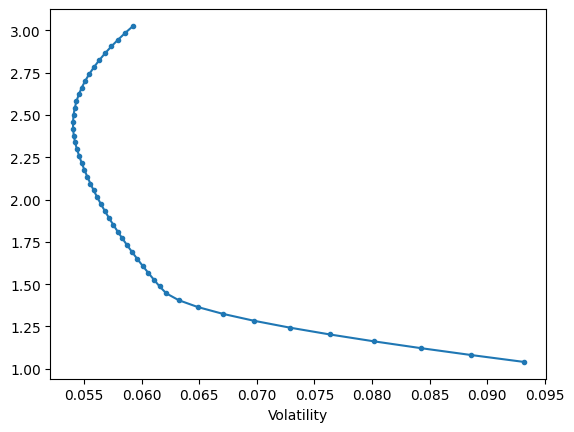

In [84]:
tk.plot_ef(50,er.values,cov.values)

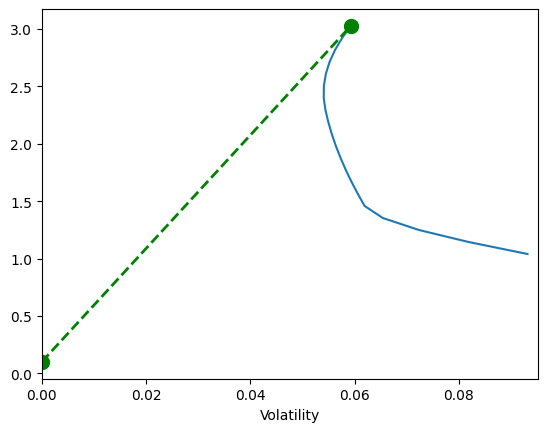

In [85]:
tk.plot_ef(20, er, cov, style='-', show_cml=True, riskfree_rate=0.1)

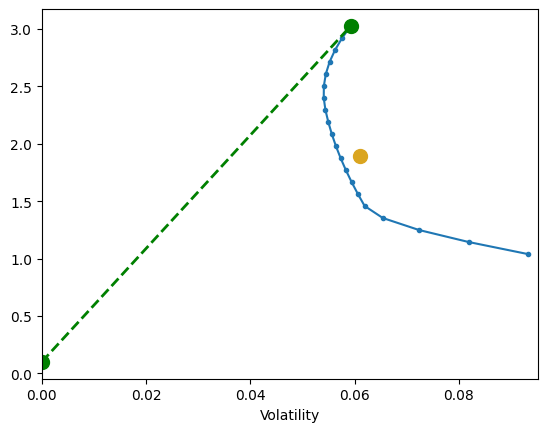

In [86]:
tk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)

<AxesSubplot: xlabel='Volatility'>

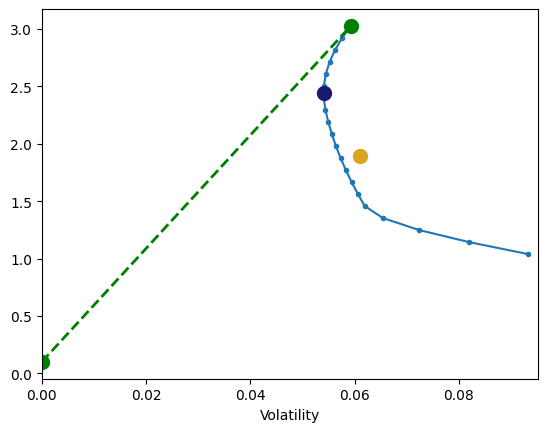

In [87]:
tk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

<AxesSubplot: xlabel='Date'>

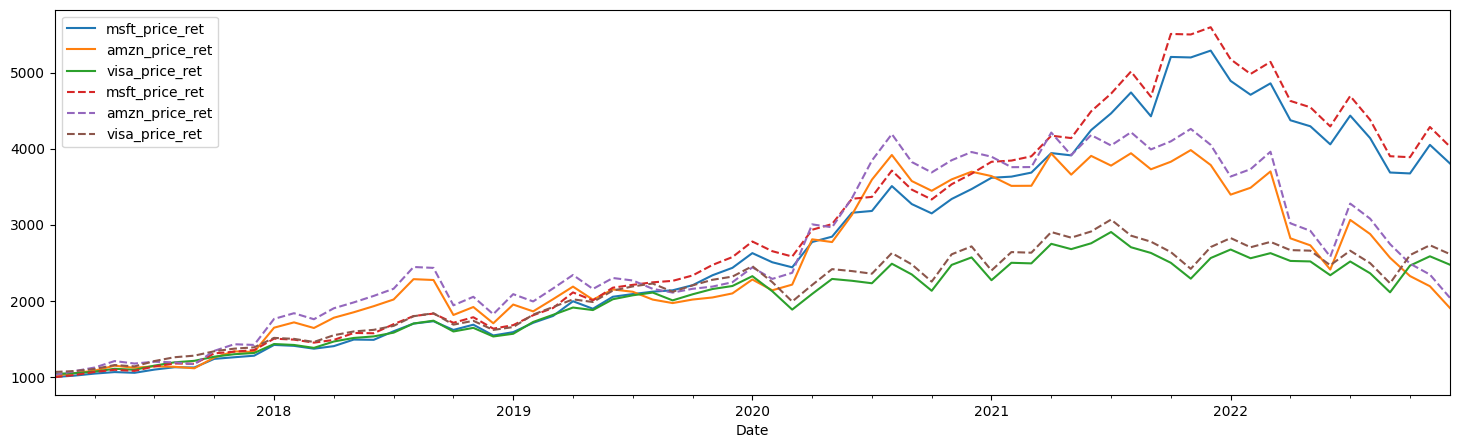

In [88]:
btr = tk.run_cppi(df[rets])
ax = btr["Wealth"].plot(figsize=(18,5))
btr["Risky Wealth"].plot(ax=ax, style="--")

In [89]:
tk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
msft_price_ret,0.257850,0.204731,-0.015687,-0.241872,0.079621,0.092131,1.083134,-0.305285
amzn_price_ret,0.113813,0.322550,0.293621,1.070206,0.134566,0.171518,0.252505,-0.520968
visa_price_ret,0.160197,0.222318,-0.019781,-0.369571,0.095026,0.106836,0.569762,-0.272889


<AxesSubplot: xlabel='Date'>

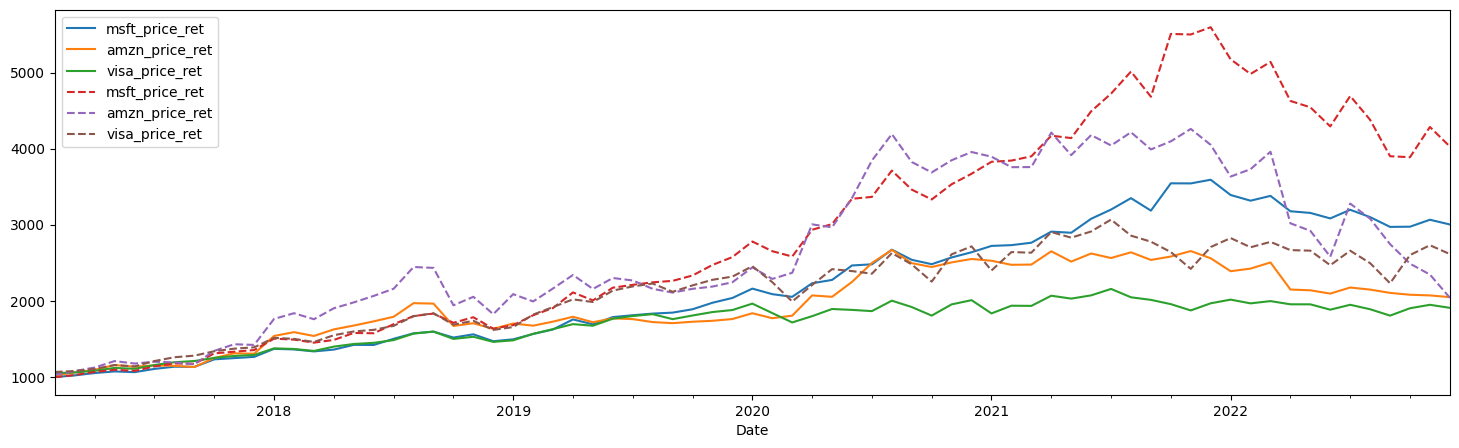

In [90]:
btr = tk.run_cppi(df[rets],drawdown=0.25)
ax = btr["Wealth"].plot(figsize=(18,5))
btr["Risky Wealth"].plot(ax=ax, style="--")

In [91]:
tk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
msft_price_ret,0.207989,0.135518,0.045939,-0.360436,0.049399,0.055896,1.278336,-0.172579
amzn_price_ret,0.126895,0.184094,0.115130,2.193291,0.074521,0.105784,0.512078,-0.232351
visa_price_ret,0.107843,0.133417,-0.397907,-0.568977,0.060558,0.069361,0.567732,-0.162731


In [92]:
tk.gbm(n_years=10,n_scenarios=1000,mu=0.07,sigma=0.15,steps_per_year=12,s_0=100,prices=True)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,98.689642,101.777918,96.390529,109.278005,105.424231,106.460217,100.716492,102.128111,100.730143,100.109903,...,101.244087,102.995125,98.223466,107.177763,103.155449,103.389286,101.497633,104.806440,99.281009,103.950473
2,100.813728,107.254540,94.486827,116.986529,111.161680,107.880089,97.059796,106.782758,105.319579,94.389963,...,104.534886,106.918909,105.866254,111.616690,100.810910,106.743491,102.475769,111.141104,105.060343,100.018858
3,93.505965,113.126588,94.838125,124.238054,111.933061,103.253449,105.884651,104.653564,107.346211,100.788404,...,102.379011,109.451712,109.196757,111.539334,105.185284,105.409540,98.039131,110.416506,111.567118,99.525576
4,101.839927,106.884684,93.091529,122.261507,114.096611,105.892736,113.731658,98.282513,110.309362,108.022380,...,102.939320,115.018574,97.377400,105.800718,103.404498,103.146120,98.895861,121.638807,111.521928,98.474423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,540.102968,325.851738,150.366487,248.373340,499.989926,251.556676,332.824048,199.547715,361.874690,241.599785,...,108.288188,152.626487,150.860540,203.676094,444.200920,161.333846,198.326481,153.029861,92.393252,91.491533
117,520.346857,337.362196,159.961548,259.743265,494.449763,244.078470,351.766774,199.600735,365.113951,235.741927,...,108.356574,156.997574,148.428064,208.874509,426.169191,154.017282,181.684901,165.493319,94.921576,86.925728
118,501.750765,330.631842,159.345799,258.595886,515.582922,236.073900,382.621309,200.151903,385.750685,245.214280,...,104.187521,144.743465,156.346941,206.182445,400.926535,148.704759,172.061892,168.559212,90.097022,86.326389
119,507.808114,329.929809,158.945044,237.680947,546.435441,219.725602,391.023220,197.729803,389.614704,259.462721,...,106.102889,155.322943,153.750106,220.749660,416.515370,148.456715,168.899134,151.390126,97.198092,81.852217


<AxesSubplot: >

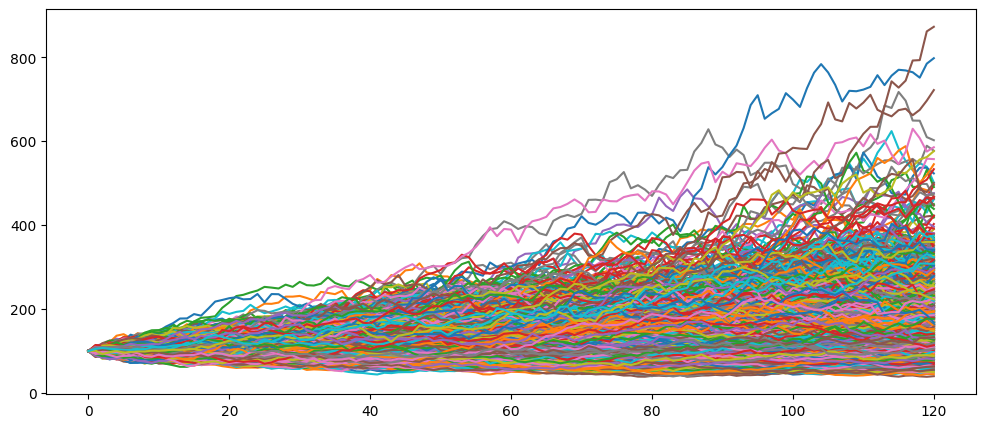

In [93]:
tk.gbm(n_years=10,n_scenarios=1000,mu=0.07,sigma=0.15,steps_per_year=12,s_0=100,prices=True).plot(figsize=(12,5), legend=False)

In [94]:
tk.gbm(n_years=10,n_scenarios=1000,mu=0.07,sigma=0.15,steps_per_year=12,s_0=100,prices=True).iloc[-1].mean(), 100*1.07**10

(198.9772882559041, 196.71513572895665)

In [95]:
liabilities = pd.Series(data=[1, 1.5, 2, 2.5], index=[3, 3.5, 4, 4.5])
tk.pv(liabilities,0.03)

0    6.23332
dtype: float64

<AxesSubplot: >

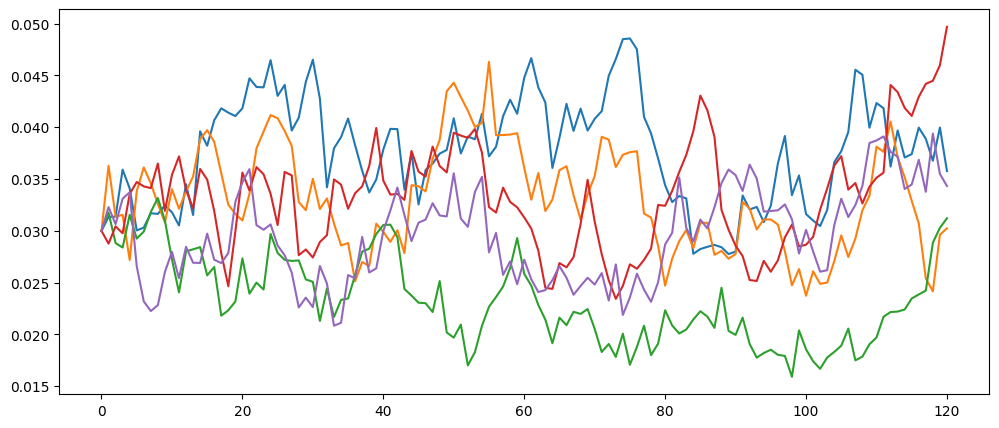

In [96]:
tk.cir(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5)[0].plot(legend=False, figsize=(12,5))

<AxesSubplot: >

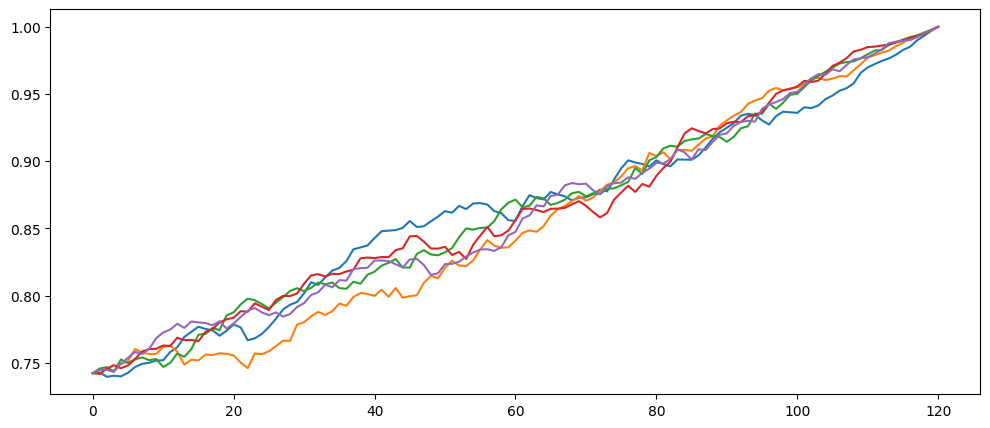

In [97]:
tk.cir(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5)[1].plot(legend=False, figsize=(12,5))

In [98]:
tk.bond_price(20, 1000, 0.05, 2, 0.04)

0    1136.777396
dtype: float64

In [99]:
tk.macaulay_duration(tk.bond_cash_flows(3, 1000, .06, 2), 0.06/2)

5.579707187194534

In [100]:
short_bond = tk.bond_cash_flows(10, 1000, .05, 1)
long_bond = tk.bond_cash_flows(20, 1000, .05, 1)
w_s = tk.match_durations(liabilities, short_bond, long_bond, 0.04)
w_s

1.7981931628121175

<AxesSubplot: >

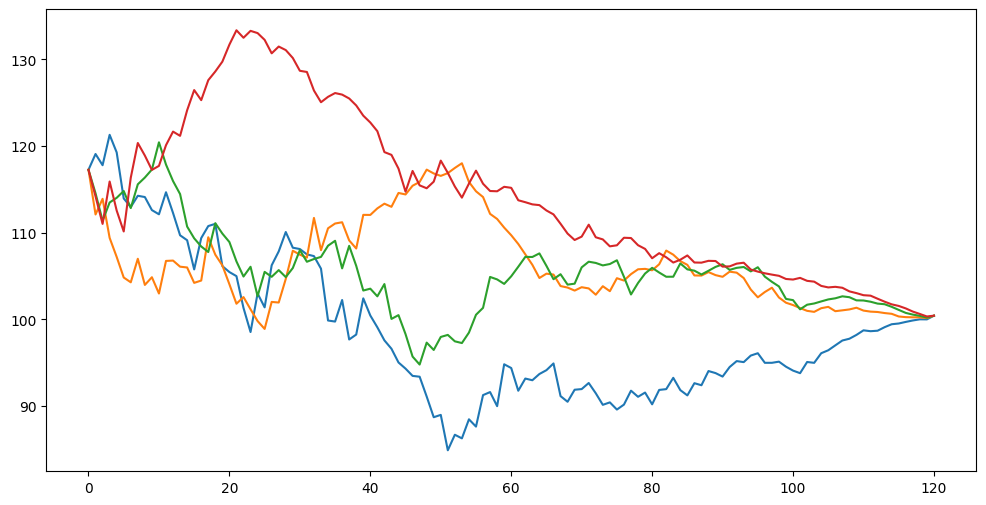

In [101]:
rates, zc_prices = tk.cir(10, 500, b=0.03, r_0 = 0.03)
tk.bond_price(10, 100, .05, 12, rates[[1,2,3,4]]).plot(legend=False, figsize=(12,6))

In [102]:
p = tk.bond_price(10, 100, .05, 12, rates[[1,2,3,4]])
btr = tk.bond_total_return(p, 100, .05, 12)
tk.annualize_rets(btr, 12)

1    0.036067
2    0.032018
3    0.032501
4     0.02893
dtype: object

In [103]:
rates, zc_prices = tk.cir(10, 500, b=0.03, r_0 = 0.03)
price_10 = tk.bond_price(10, 100, .05, 12, rates)
price_30 = tk.bond_price(30, 100, .05, 12, rates)
rets_30 = tk.bond_total_return(price_30, 100, .05, 12)
rets_10 = tk.bond_total_return(price_10, 100, .05, 12)
rets_bonds = tk.bt_mix(rets_10, rets_30, allocator=tk.fixedmix_allocator, w1=.6)
mean_rets_bonds = rets_bonds.mean(axis='columns')
tk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035924,0.003483,0.529443,0.177372,-0.001398,-0.0011,1.655595,0.0


In [104]:
price_eq = tk.gbm(n_years=10,n_scenarios=500,mu=0.07, sigma=0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()

In [105]:
rets_7030b = tk.bt_mix(rets_eq, rets_bonds, allocator=tk.fixedmix_allocator, w1=0.7)
rets_7030b_mean = rets_7030b.mean(axis='columns')
tk.summary_stats(pd.DataFrame(rets_7030b_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.059526,0.004783,0.220017,0.21182,-0.002579,-0.001999,6.008481,0.0


In [106]:
rets_g8020 = tk.bt_mix(rets_eq, rets_bonds, allocator=tk.glidepath_allocator, start_glide=.8, end_glide=.2)
pd.concat([tk.terminal_stats(rets_bonds, name="FI"), 
           tk.terminal_stats(rets_eq, name="Eq"),
           tk.terminal_stats(rets_7030b, name="70/30"),
           tk.terminal_stats(rets_g8020, name="Glide 80 to 20")],
          axis=1)

,FI,Eq,70/30,Glide 80 to 20
mean,1.385531,1.954717,1.775332,1.653178
std,0.112393,0.934440,0.587057,0.417291
p_breach,NaN,0.050000,0.014000,0.006000
e_short,NaN,0.146671,0.097904,0.102307
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


In [107]:
n_scenarios =  5000
rates, zc_prices = tk.cir(10, n_scenarios=n_scenarios, b=0.03, r_0 = 0.03, sigma=0.02)
price_eq = tk.gbm(n_years=10,n_scenarios=n_scenarios, mu=0.07, sigma=0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()
rets_7030b = tk.bt_mix(rets_eq, rets_zc, allocator=tk.fixedmix_allocator, w1=0.7)
rets_floor75 = tk.bt_mix(rets_eq, rets_zc, allocator=tk.floor_allocator, floor=.75,  zc_prices=zc_prices[1:])
rets_floor75m1 = tk.bt_mix(rets_eq, rets_zc, allocator=tk.floor_allocator, zc_prices=zc_prices[1:], floor=.75, m=1)
rets_floor75m5 = tk.bt_mix(rets_eq, rets_zc, allocator=tk.floor_allocator, zc_prices=zc_prices[1:], floor=.75, m=5)
rets_floor75m10 = tk.bt_mix(rets_eq, rets_zc, allocator=tk.floor_allocator, zc_prices=zc_prices[1:], floor=.75, m=10)
pd.concat([tk.terminal_stats(rets_zc, name="ZC", floor=0.75), 
           tk.terminal_stats(rets_eq, name="Eq", floor=0.75),
           tk.terminal_stats(rets_7030b, name="70/30", floor=0.75),
           tk.terminal_stats(rets_floor75, name="Floor75", floor=0.75),
           tk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=0.75),
           tk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=0.75),
           tk.terminal_stats(rets_floor75m10, name="Floor75m10", floor=0.75)
          ],
          axis=1).round(2)

,ZC,Eq,70/30,Floor75,Floor75m1,Floor75m5,Floor75m10
mean,1.34,1.97,1.75,1.94,1.62,1.95,1.96
std,0.00,0.98,0.60,0.99,0.43,0.99,0.99
p_breach,NaN,0.04,0.01,NaN,NaN,0.00,0.03
e_short,NaN,0.12,0.07,NaN,NaN,0.00,0.00
p_reach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\HAME\AppData\Local\Temp\ipykernel_22452\2269016482.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tv_eq, color="red", label="100% Equities", bins=100)
C:\Users\HAME\AppData\Local\Temp\ipykernel_22452\2269016482.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tv_7030b, color="o

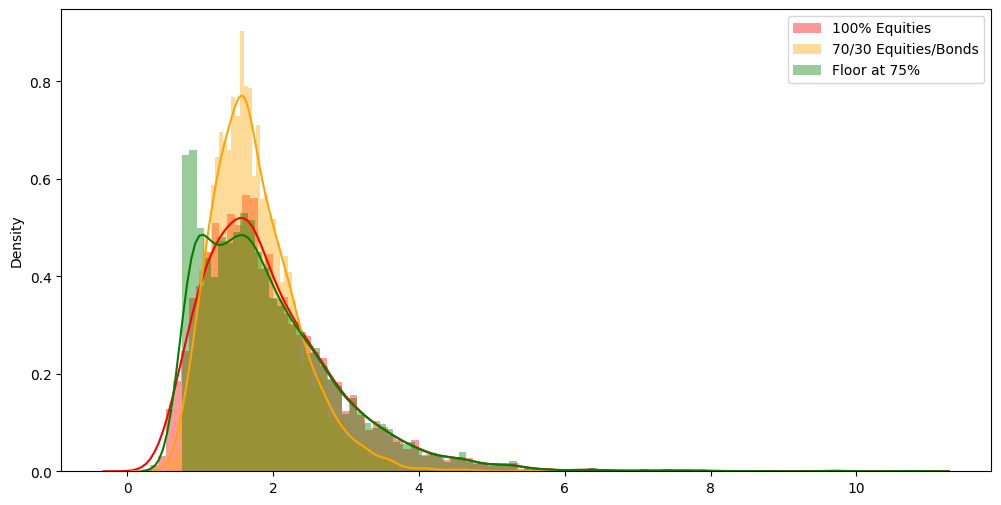

In [108]:
tv_eq = tk.terminal_values(rets_eq)
tv_zc = tk.terminal_values(rets_zc)
tv_7030b = tk.terminal_values(rets_7030b)
tv_floor75 = tk.terminal_values(rets_floor75)
tv_floor75m1 = tk.terminal_values(rets_floor75m1)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.distplot(tv_eq, color="red", label="100% Equities", bins=100)
#sns.distplot(tv_zc, color="blue", label="100% Immunized Bonds")
sns.distplot(tv_7030b, color="orange", label="70/30 Equities/Bonds", bins=100)
sns.distplot(tv_floor75, color="green", label="Floor at 75%", bins=100)

plt.legend();